In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Train.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   1000 non-null   int64 
 1   Warehouse_block      1000 non-null   object
 2   Mode_of_Shipment     1000 non-null   object
 3   Customer_care_calls  1000 non-null   int64 
 4   Customer_rating      1000 non-null   int64 
 5   Cost_of_the_Product  1000 non-null   int64 
 6   Prior_purchases      1000 non-null   int64 
 7   Product_importance   1000 non-null   object
 8   Gender               1000 non-null   object
 9   Discount_offered     1000 non-null   int64 
 10  Weight_in_gms        1000 non-null   int64 
 11  Reached.on.Time_Y.N  1000 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 93.9+ KB


In [3]:
df['Cost_of_the_Product'].mean()

np.float64(200.316)

In [4]:
df['Cost_of_the_Product'].value_counts()
df['Weight_in_gms'].value_counts()
df['Weight_in_gms'].iloc[0:20]
df['Reached.on.Time_Y.N'].unique()

array([1, 0])

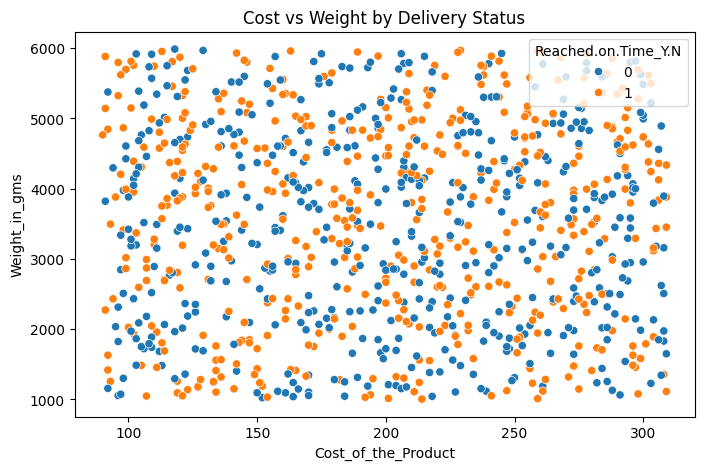

In [5]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Cost_of_the_Product', y='Weight_in_gms', hue='Reached.on.Time_Y.N', data=df)
plt.title("Cost vs Weight by Delivery Status")
plt.xlabel("Cost_of_the_Product")
plt.ylabel("Weight_in_gms")
plt.show()


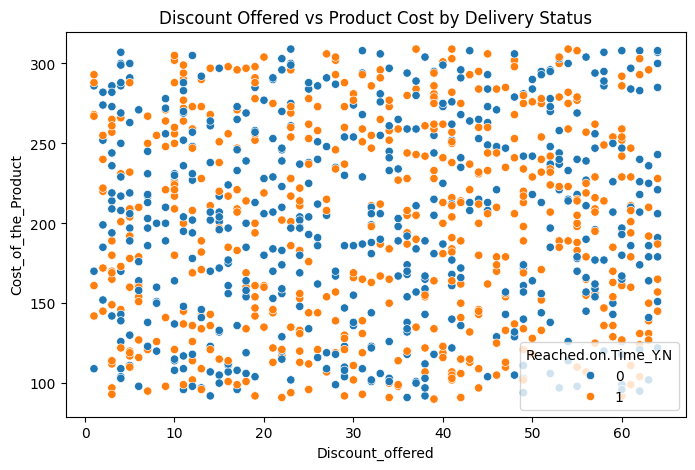

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Discount_offered',
    y='Cost_of_the_Product',
    hue='Reached.on.Time_Y.N',
    data=df
)

plt.title("Discount Offered vs Product Cost by Delivery Status")
plt.xlabel("Discount_offered")
plt.ylabel("Cost_of_the_Product")
plt.show()


In [9]:
df['Cost_of_the_Product'].mean()


np.float64(200.316)

In [10]:
high_cost = df[df['Cost_of_the_Product'] > df['Cost_of_the_Product'].mean()]
high_cost


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,C,Flight,2,5,306,6,high,M,45,3838,1
2,3,B,Ship,7,2,215,7,medium,F,44,4152,0
5,6,F,Road,5,1,252,2,low,F,60,1866,1
6,7,D,Flight,5,1,235,3,medium,M,42,2947,0
8,9,C,Flight,2,4,240,4,high,F,2,2610,1
...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,C,Road,7,5,273,3,low,M,23,1476,1
991,992,C,Road,4,3,233,10,medium,M,54,3780,0
992,993,D,Road,4,3,230,2,low,F,10,4797,0
998,999,A,Road,5,3,296,3,low,M,17,1487,1


In [11]:
high_importance = df[df['Product_importance'] == 'high']
high_importance


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,C,Flight,2,5,306,6,high,M,45,3838,1
1,2,F,Ship,7,2,114,3,high,M,35,2710,1
7,8,B,Road,2,3,114,4,high,F,10,2066,0
8,9,C,Flight,2,4,240,4,high,F,2,2610,1
10,11,D,Road,6,3,198,7,high,M,55,3469,1
...,...,...,...,...,...,...,...,...,...,...,...,...
974,975,D,Road,3,1,99,10,high,F,17,3993,1
977,978,F,Road,4,4,132,4,high,M,48,4959,0
979,980,B,Ship,5,2,145,7,high,M,2,4678,1
986,987,A,Road,2,4,115,4,high,M,43,3861,1


In [12]:
df[df['Cost_of_the_Product'] < df['Cost_of_the_Product'].mean()].shape[0]


491

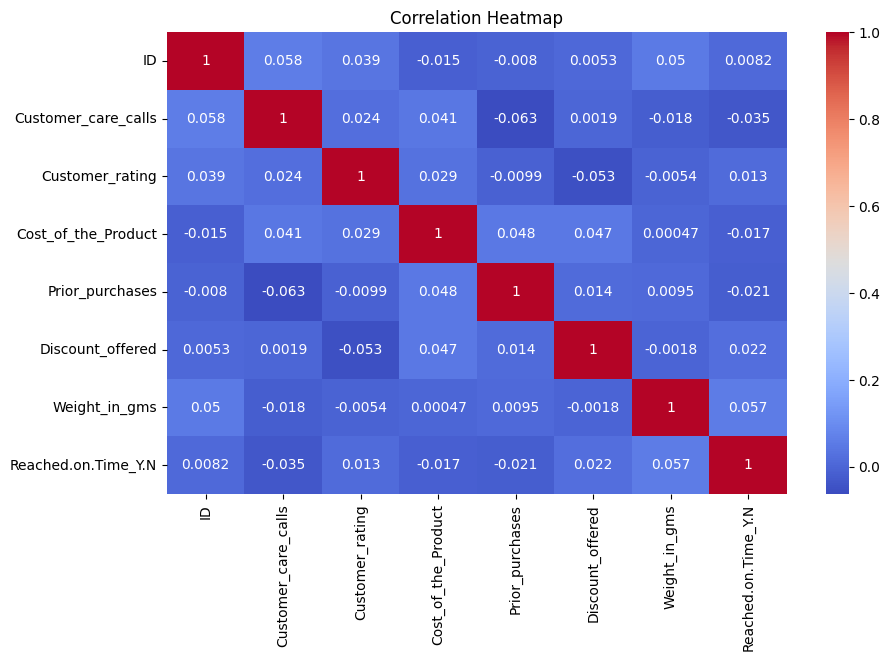

In [13]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [14]:
pivot = pd.pivot_table(
    df,
    values='Discount_offered',
    index='Mode_of_Shipment',
    aggfunc='mean'
)

pivot


,Discount_offered
Mode_of_Shipment,
Flight,31.344720
Road,33.037681
Ship,31.519520


In [15]:
pivot = pd.pivot_table(
    df,
    values='Reached.on.Time_Y.N',
    index='Mode_of_Shipment',
    aggfunc='count'
)

pivot


,Reached.on.Time_Y.N
Mode_of_Shipment,
Flight,322
Road,345
Ship,333
